# Independent Validation

In this notebook, I will perform independent validation of my Graph Convolution Network based model. 

I validate my model and consequently the biomarkers I produce using the model on the TCGA BRCA multi-omics data set using the following three methods:
1. Generate biomarkers from both the data sets (TCGA BRCA & METABRIC) separately and then compare them
2. Train the model on TCGA BRCA data and then validate on METABRIC data
3. Train and test on METABRIC data but with only features selected from the TCGA BRCA data
4. Train the model on TCGA BRCA data, impute the other omics data for METABRIC data using TCGA BRCA, and then validate on the the imputed data

## Section 1: Biomarker comparison

In this section, we will generate biomarkers using our model and LIME on both the data sets and then compare the biomarker sets.

In [1]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd
import numpy as np

In [2]:
# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 850
test_interval = 50
lr = 5e-4
weight_decay = 1e-3
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

### TCGA BRCA

In [3]:
RUN_TITLE = "TCGA BRCA mRNA Expression"
RUN_TITLE_SHORT = "tcga_brca_mrna"

# pre-processed data
mrna = "../R/TCGA BRCA/mrna_top1000_scaled.csv"
meta_csv = "../R/TCGA BRCA/PAM50_subtype.csv"
trte_partition_file = "../R/TCGA BRCA/trte_partition.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [4]:
losses_tcga, metrics_tcga, feature_imp_tcga, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga.to_csv("losses_tcga.csv")
metrics_tcga.to_csv("metrics_tcga.csv")
#feature_imp_tcga["lime"].to_csv("tcga_features.csv", index_label="features")

2021-05-20 10:47:24.058579 

TCGA BRCA mRNA Expression
SEED =  42


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)



Training...

Test: Epoch 0
Train Accuracy: 0.1828   Test ACC: 0.4837
Train F1: 0.1356         Test F1: 0.3154

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0239              0.1359              0.0000
Basal 	           0.2000              0.4689              0.1522              0.0000
Her2 	           0.2000              0.1196              0.0543              0.0000
LumA 	           0.2000              0.0000              0.4837              1.0000
LumB 	           0.2000              0.3014              0.1739              0.0000


Test: Epoch 50
Train Accuracy: 0.7780   Test ACC: 0.4565
Train F1: 0.7699         Test F1: 0.3711

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------



Test: Epoch 600
Train Accuracy: 0.9722   Test ACC: 0.8098
Train F1: 0.9722         Test F1: 0.8161

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9617              0.1359              0.8400
Basal 	           0.2000              1.0000              0.1522              0.9643
Her2 	           0.2000              1.0000              0.0543              1.0000
LumA 	           0.2000              0.9426              0.4837              0.7753
LumB 	           0.2000              0.9569              0.1739              0.6875


Test: Epoch 650
Train Accuracy: 0.9474   Test ACC: 0.8098
Train F1: 0.9464         Test F1: 0.8043

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

### METABRIC

In [5]:
RUN_TITLE = "METABRIC mRNA Expression"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_top1000_scaled.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [6]:
losses_metabric, metrics_metabric, feature_imp_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_metabric.to_csv("losses_metabric.csv")
metrics_metabric.to_csv("metrics_metabric.csv")
#feature_imp_metabric["lime"].to_csv("metabric_features.csv", index_label="features")

2021-05-20 10:49:03.250806 

METABRIC mRNA Expression
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.1730   Test ACC: 0.2578
Train F1: 0.1371         Test F1: 0.1057

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0322              0.1456              0.0000
Basal 	           0.2000              0.3777              0.2154              0.0000
Her2 	           0.2000              0.1545              0.1547              0.0000
LumA 	           0.2000              0.0043              0.2578              1.0000
LumB 	           0.2000              0.2961              0.2265              0.0000


Test: Epoch 50
Train Accuracy: 0.8124   Test ACC: 0.6805
Train F1: 0.8084         Test F1: 0.6754

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
--------------------------


Test: Epoch 600
Train Accuracy: 0.9446   Test ACC: 0.7149
Train F1: 0.9440         Test F1: 0.7139

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9871              0.1456              0.5764
Basal 	           0.2000              0.9678              0.2154              0.6432
Her2 	           0.2000              0.9700              0.1547              0.6667
LumA 	           0.2000              0.8176              0.2578              0.9608
LumB 	           0.2000              0.9807              0.2265              0.6250


Test: Epoch 650
Train Accuracy: 0.9412   Test ACC: 0.7169
Train F1: 0.9406         Test F1: 0.7149

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

### Comparing Biomarkers

In [2]:
tcga = pd.read_csv("tcga_features.csv")
metabric = pd.read_csv("metabric_features.csv")

# Small modifications
tcga = tcga.rename(columns = {"aggregate": "TCGA"})
metabric = metabric.rename(columns = {"aggregate": "METABRIC"})

# Removing gene ids from TCGA features column
tcga = tcga.assign(features = [x.split("|")[1] for x in tcga["features"]])

# Converting Entrez IDs from int64 to str
tcga["features"] = tcga["features"].apply(str)
metabric["features"] = metabric["features"].apply(str)

# Common biomarkers (out of the thousand each)
common = tcga.merge(metabric, how = "inner", on = "features")

In [3]:
# Intersection of the 1000 best features selected
print("Number of features independently selected in TCGA =", tcga.shape[0])
print("Number of features independently selected in METABRIC =", metabric.shape[0])
print("Number of common features in the two sets =", common.shape[0])

Number of features independently selected in TCGA = 1000
Number of features independently selected in METABRIC = 1000
Number of common features in the two sets = 94


In [18]:
# Is this overlap significant?
q = common.shape[0]         # Size of the overlap
m = tcga.shape[0] - 47      # Number of genes selected in TCGA - genes not present in METABRIC
k = metabric.shape[0] - 17  # Number of genes selected in METABRIC - genes not present in TCGA
n = 17206                   # Total number of common genes in TCGA and METABRIC

# phyper(q-1, m, n-m, k, lower.tail = FALSE, log.p = FALSE)
from scipy.stats import hypergeom
p = 1 - hypergeom.cdf(q, n-m, m, k, loc=0)
print(p)

8.114079524945694e-07


p < 0.01  
The overlap is significant.

In [18]:
# Correlation of the common biomarkers
print("The correlation between the feature importance values for TCGA and METABRIC data sets are as follows:\n")
# Pearson correlation
print("Pearson Correlation Coefficient =", common["TCGA"].corr(common["METABRIC"], method = "pearson"))
# Spearman correlation
print("Spearman Correlation Coefficient =", common["TCGA"].corr(common["METABRIC"], method = "spearman"))

The correlation between the feature importance values for TCGA and METABRIC data sets are as follows:

Pearson Correlation Coefficient = 0.577618646589516
Spearman Correlation Coefficient = 0.418574576454864


## Section 2: Testing on Independent Set

In this section, we will train the model on TCGA BRCA data and then validate the model on METABRIC data. To ensure that the feature set is the same in both the data sets, I have selected the best features using ANOVA on the BRCA data set and then removed the features not found in the METABRIC data set. This results in only removal of 5% of the originally selected features from the BRCA data set.

In [19]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = "random"

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 1000
test_interval = 50
lr = 5e-5
weight_decay = 5e-4
dropout = 0.50
adj_parameter = 5 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
feature_extract = []

In [20]:
RUN_TITLE = "TCGA Training & METABRIC Testing: mRNA Expression"
RUN_TITLE_SHORT = "tcga_metabric"

# pre-processed data
mrna = "../R/METABRIC/tcga_metabric_mrna_scaled_separately.csv"
meta_csv = "../R/METABRIC/PAM50_tcga_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_tcga_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [21]:
losses_tcga_metabric, metrics_tcga_metabric, features_tcga_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-05-20 10:59:19.703445 

TCGA Training & METABRIC Testing: mRNA Expression
SEED =  83810

Training...

Test: Epoch 0
Train Accuracy: 0.1826   Test ACC: 0.3676
Train F1: 0.1622         Test F1: 0.2633

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0336              0.1017              0.0000
Basal 	           0.2000              0.1040              0.1667              0.0634
Her2 	           0.2000              0.1409              0.1208              0.0000
LumA 	           0.2000              0.3792              0.3630              0.8779
LumB 	           0.2000              0.2550              0.2477              0.1545


Test: Epoch 50
Train Accuracy: 0.5503   Test ACC: 0.3207
Train F1: 0.5406         Test F1: 0.2804

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accurac


Test: Epoch 600
Train Accuracy: 0.9389   Test ACC: 0.7175
Train F1: 0.9385         Test F1: 0.7171

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9396              0.1017              0.5000
Basal 	           0.2000              0.9866              0.1667              0.7523
Her2 	           0.2000              1.0000              0.1208              0.6583
LumA 	           0.2000              0.8423              0.3630              0.8141
LumB 	           0.2000              0.9262              0.2477              0.6707


Test: Epoch 650
Train Accuracy: 0.9490   Test ACC: 0.7150
Train F1: 0.9487         Test F1: 0.7131

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

<AxesSubplot:>

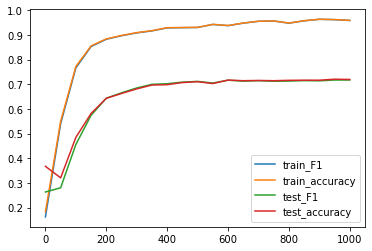

In [22]:
#metrics_tcga_metabric.head()
metrics_tcga_metabric.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

## Section 3: METABRIC, but with features pre-selected from TCGA BRCA

In [40]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 850
test_interval = 50
lr = 5e-4
weight_decay = 1e-3
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

In [41]:
RUN_TITLE = "METABRIC mRNA Expression, but with TCGA BRCA features"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_mrna_common_genes.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [42]:
losses_metabric_preselected, metrics_metabric_preselected, _, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

#losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
#metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-05-20 11:31:21.748132 

METABRIC mRNA Expression, but with TCGA BRCA features
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.2043   Test ACC: 0.2578
Train F1: 0.1243         Test F1: 0.1057

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.6416              0.1456              0.0000
Basal 	           0.2000              0.0300              0.2154              0.0000
Her2 	           0.2000              0.3476              0.1547              0.0000
LumA 	           0.2000              0.0000              0.2578              1.0000
LumB 	           0.2000              0.0021              0.2265              0.0000


Test: Epoch 50
Train Accuracy: 0.7562   Test ACC: 0.6653
Train F1: 0.7495         Test F1: 0.6530

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accura


Test: Epoch 600
Train Accuracy: 0.9176   Test ACC: 0.6987
Train F1: 0.9147         Test F1: 0.6976

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9828              0.1456              0.5139
Basal 	           0.2000              0.9678              0.2154              0.6620
Her2 	           0.2000              0.9893              0.1547              0.5686
LumA 	           0.2000              0.6953              0.2578              0.9059
LumB 	           0.2000              0.9528              0.2265              0.7054


Test: Epoch 650
Train Accuracy: 0.9288   Test ACC: 0.7068
Train F1: 0.9271         Test F1: 0.7057

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

<AxesSubplot:>

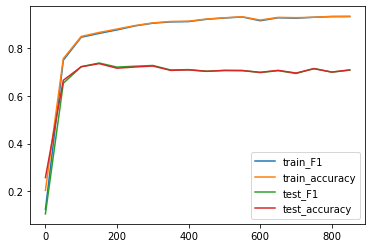

In [43]:
metrics_metabric_preselected.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

## Section 4: Testing on Independent Imputed Set

In this section, we will again train the model on TCGA BRCA data, but instead of training on only the single omics (gene expression) that is present in both data sets, I will use a modified METABRIC data set where the missing omics (DNA Methylation and miRNA expression) are imputed using the TCGA BRCA data. Thus, this will be a multi-omic validation.

### Imputation
First we need to impute the data.

In [31]:
mrna_file = "../R/TCGA BRCA/mrna_top1000.csv"
meth_file = "../R/TCGA BRCA/meth_top1000.csv"
mirna_file = "../R/TCGA BRCA/mirna_anova.csv"

mrna_tcga = pd.read_csv(mrna_file, index_col="patient_id")
meth_tcga = pd.read_csv(meth_file, index_col="patient_id")
mirna_tcga = pd.read_csv(mirna_file, index_col="patient_id")
mrna_tcga.columns = [x.split("|")[1] for x in mrna_tcga.columns.tolist()]

# Load metabric mrna and find if the column names match
metabric_file = "../R/METABRIC/metabric_mrna_common_genes.csv"
metabric = pd.read_csv(metabric_file, index_col="patient_id")

# Scaling data
metabric = (metabric - metabric.mean())/metabric.std() #metabric.min())/(metabric.max() - metabric.min())
mrna_tcga = (mrna_tcga - mrna_tcga.mean())/mrna_tcga.std() #mrna_tcga.min()/(mrna_tcga.max() - mrna_tcga.min()))
meth_tcga = (meth_tcga - meth_tcga.mean())/meth_tcga.std() #meth_tcga.min()/(meth_tcga.max() - meth_tcga.min()))
mirna_tcga = (mirna_tcga - mirna_tcga.mean())/mirna_tcga.std() #mirna_tcga.min()/(mirna_tcga.max() - mirna_tcga.min()))

# Common features
common = [x for x in metabric.columns.tolist() if x in mrna_tcga.columns.tolist()]

# Merging tcga data together
tcga = pd.merge(pd.merge(mrna_tcga, meth_tcga, left_index=True, right_index=True), mirna_tcga,  left_index=True, right_index=True)
datatypes = ["mrna"]*mrna_tcga.shape[1] + ["meth"]*meth_tcga.shape[1] + ["mirna"]*mirna_tcga.shape[1]

# Vertically joining tcga and metabric data; missing features have NaN values
merged_data = pd.concat([tcga, metabric], keys=["tcga", "metabric"])

In [32]:
# Imputing the missing features in metabric data set
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)
imputer.fit(merged_data.loc["tcga"])

metabric_imputed = imputer.transform(merged_data.loc["metabric"])
metabric_imputed = pd.DataFrame(metabric_imputed, columns = merged_data.columns, index = merged_data.loc["metabric"].index)
metabric_imputed.head()

,10926,1602,585,91133,7083,56204,23171,85004,10411,130888,...,hsa-mir-217,hsa-mir-424,hsa-mir-581,hsa-mir-483,hsa-mir-3614,hsa-mir-16-1,hsa-mir-550a-2,hsa-mir-24-1,hsa-mir-508,hsa-mir-642a
patient_id,,,,,,,,,,,,,,,,,,,,,
MB-0002,-0.014999,0.394062,0.291286,-0.334824,-1.048008,0.526722,1.458258,1.318898,-1.513677,1.123605,...,-0.089832,0.177222,0.226528,-0.053391,-0.143277,-0.186579,-0.118947,0.002087,-0.149463,-0.072987
MB-0008,-0.303583,-0.829574,-0.821169,-0.141385,0.248524,0.481390,-0.507568,-0.285917,-0.502177,-1.537316,...,-0.080471,0.002028,-0.112891,-0.061183,0.422170,-0.153718,-0.094877,-0.008731,-0.081193,-0.211365
MB-0010,0.917399,0.390333,-0.902791,0.391926,0.897199,-0.579003,0.408938,-0.254797,-1.081950,1.270355,...,-0.088286,0.187724,0.201692,-0.053467,-0.100413,-0.082047,-0.123761,0.464171,-0.157772,-0.000955
MB-0035,1.670517,2.252454,-1.452800,-0.698280,0.324651,1.241530,1.895824,-0.142129,-1.215680,-0.685873,...,-0.016863,0.154846,0.143743,-0.053276,-0.127423,-0.136289,-0.148633,-0.169069,-0.102191,-0.050240
MB-0036,0.723166,2.336621,1.490107,-0.442490,-0.284127,0.191001,-0.586400,1.095476,-0.830777,0.946928,...,-0.032493,-0.066798,0.044401,-0.048578,-0.117050,-0.165032,-0.128575,-0.142411,-0.106682,-0.065405


Now, divide the data frames up according to the list "datatypes" and then save them to individual csv files in the R/METABRIC folder and then supply them to the model to work on.

In [33]:
# Vertically joining tcga and metabric_imputed data
complete_data = pd.concat([tcga, metabric_imputed])

# Separating the omics
mask = [x=="mrna" for x in datatypes]
mrna = complete_data.loc[:, mask]

mask = [x=="meth" for x in datatypes]
meth = complete_data.loc[:, mask]

mask = [x=="mirna" for x in datatypes]
mirna = complete_data.loc[:, mask]

In [34]:
# Getting labels
meta_csv = "../R/METABRIC/PAM50_tcga_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_tcga_metabric.txt"

meta = pd.read_csv(meta_csv, index_col="patient_id")
meta = meta.reindex(index=mirna.index)
#labels.iloc[:,0].value_counts()
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}
labels = [label_dict[x] for x in meta.iloc[:,0].tolist()]


# Getting training and testing indices
patient_id = mirna.index.to_numpy()
with open(trte_partition_file, 'r') as f:
    lines = f.readlines()

tr_patient_id_list = lines[1].strip().split(',')
te_patient_id_list = lines[3].strip().split(',')
tr_idx = [np.where(patient_id == pid)[0][0] for pid in tr_patient_id_list]
te_idx = [np.where(patient_id == pid)[0][0] for pid in te_patient_id_list]
te_idx = sorted(te_idx)

In [35]:
print(all(mrna.index == meth.index))
print(all(meth.index == mirna.index))
print(all(mrna.index == meta.index))

True
True
True


In [36]:
SEED = "random"

doSMOTE = True 

# Training parameters
num_epoch = 2000
test_interval = 50
lr = 5e-4
weight_decay = 5e-4
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

In [37]:
from experimental import process, train

data_list = [mrna, meth, mirna]
labels = np.array(labels)
indices = (tr_idx, te_idx)

GCN_names = ["mRNA", "meth", "mirna"]
COMBINER = False

data = process(data_list, labels, indices, SEED=SEED)

SEED =  61748


In [38]:
loss, metrics, _, _ = train(data, label_dict=label_dict, GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE,
        #RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, feature_extract=feature_extract)


2021-05-20 11:11:40.780266 


SEED =  55325

Training...

Test: Epoch 0
Train Accuracy: 0.1611   Test ACC: 0.3630
Train F1: 0.1199         Test F1: 0.1934

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0000              0.1017              0.0000
Basal 	           0.2000              0.2181              0.1667              0.0000
Her2 	           0.2000              0.0235              0.1208              0.0000
LumA 	           0.2000              0.4832              0.3630              1.0000
LumB 	           0.2000              0.0805              0.2477              0.0000


Test: Epoch 50
Train Accuracy: 0.7262   Test ACC: 0.4496
Train F1: 0.7130         Test F1: 0.3966

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
-----------------------------------------------


Test: Epoch 600
Train Accuracy: 0.9295   Test ACC: 0.7085
Train F1: 0.9286         Test F1: 0.6998

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9564              0.1017              0.4010
Basal 	           0.2000              0.9866              0.1667              0.7462
Her2 	           0.2000              0.9933              0.1208              0.6167
LumA 	           0.2000              0.7953              0.3630              0.9251
LumB 	           0.2000              0.9161              0.2477              0.5366


Test: Epoch 650
Train Accuracy: 0.9295   Test ACC: 0.7160
Train F1: 0.9283         Test F1: 0.7140

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  


Test: Epoch 1200
Train Accuracy: 0.9336   Test ACC: 0.7140
Train F1: 0.9324         Test F1: 0.7056

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9664              0.1017              0.4059
Basal 	           0.2000              0.9933              0.1667              0.7281
Her2 	           0.2000              0.9933              0.1208              0.6458
LumA 	           0.2000              0.7886              0.3630              0.9390
LumB 	           0.2000              0.9262              0.2477              0.5346


Test: Epoch 1250
Train Accuracy: 0.9255   Test ACC: 0.7090
Train F1: 0.9241         Test F1: 0.7008

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	


Test: Epoch 1800
Train Accuracy: 0.9336   Test ACC: 0.6984
Train F1: 0.9326         Test F1: 0.6848

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9631              0.1017              0.3762
Basal 	           0.2000              0.9866              0.1667              0.7341
Her2 	           0.2000              0.9933              0.1208              0.6292
LumA 	           0.2000              0.8020              0.3630              0.9667
LumB 	           0.2000              0.9228              0.2477              0.4472


Test: Epoch 1850
Train Accuracy: 0.9315   Test ACC: 0.7059
Train F1: 0.9305         Test F1: 0.6948

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	

<AxesSubplot:>

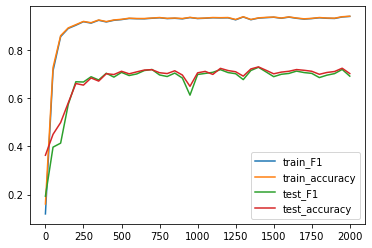

In [39]:
metrics.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])